## Matplotlib Learning

Following @jakevdp's book

### TODO 

- Redo first parts of the lesson that I lost when I rebooted.
- Intro
- Simple Line Plots

In [4]:
import matplotlib as mpl
import matplotlib.colors as col
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import numpy as np
import warnings

In [21]:
%matplotlib inline
mpl.rcParams.update(mpl.rcParamsDefault)
warnings.simplefilter('ignore')

## Simple Scatter Plots

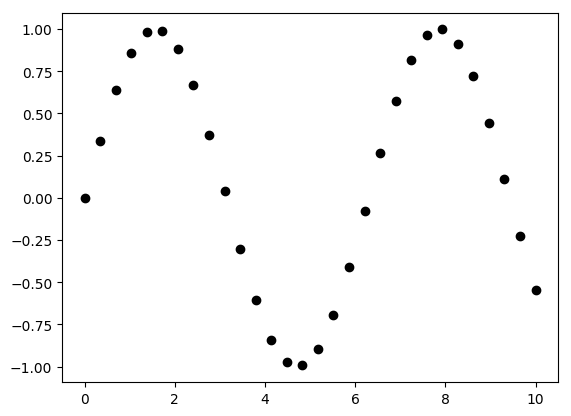

In [22]:
#%matplotlib inline
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');



In [11]:
mpl.rcParams['figure.figsize']

[6.4, 4.8]

### Different markers

In [14]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker, 
            label="marker='{0}'".format(marker))
    
plt.legend(numpoints=1)
plt.xlim(0, 1.8);


In [ ]:
plt.plot(x, y, '-ok');

In [ ]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

### Scatter Plots with ```plt.scatter```

This tool is essensitally a clone of `plt.plot` with the exception that `plt.scatter` has the added ability to change the attributes (e.g. color, and size) of each individual point.  For this reason, with larger plots, it will be slower to use `plt.scatter`.

In [ ]:
plt.scatter(x, y, marker='o');

In [ ]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
           cmap='viridis')

plt.colorbar();

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
           s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Visualizing Errors

In [ ]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='o', color='k',
            ecolor='lightgray', elinewidth=3, capsize=0)



### Continuous error with a Gaussian Process model

In [ ]:
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1e-1,
                    random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

In [ ]:
# visualize the result
plt.plot(xdata, ydata, 'or');
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                color='gray', alpha=0.2)

plt.xlim(0, 10);


## Custimizing plots

In [ ]:
color_dict = {'economist': '#e3120b',
              'beijing': '#121212',
              'kiev': '#383e42',
              'moscow': '#7a7a7a',
              'london': '#b6b6b6',
              'cardiff': '#d7d7d7',
              'berlin': '#f2f2f2',
              'prague': '#fbfbfb',
              'thimphu': '#ffffff',
              'honolulu': '#16c9b3',
              'dakar': '#0d6380',
              'boston': '#c5cbe9',
              'milan': '#4c60eb',
              'chicago': '#3e51b5',
              'kosice': '#8594e6',
              'athens': '#20328e',
              'copenhagen': '#38a8e0',
              'budapest': '#fc150d',
              'timbuktu': '#bc2621',
              'york': '#fff600', 
              'amsterdam': '#fed630',
              'bristol': '#08c5b2',
              'rome': '#f39200', 
              'genoa': '#4e64b5',
              'manchester': '#3ca8df'}

In [ ]:
fig, ax = plt.subplots(figsize=(24,14))

i = 1
for color in color_dict.keys():
    ax.plot(x, [i-5]*len(x), color='w', linewidth=5)
    ax.plot(x, [i]*len(x), color=color_dict[color], linewidth=10)
    plt.text(10.2, i-1, '{}-{}'.format(color, color_dict[color] ), size=16)
    ax.plot(x, [i+5]*len(x), color='w', linewidth=5)
    i = i + 10

ax.set(xlim=(0, 12));

In [33]:
color_dict2 = {                
  'red' : [
    '#E30010',
    '#e11b17',
    '#E84932',
    '#E88B6F',
    '#EBA289'
  ],
  'brown' : [
    '#632514',
    '#762B1A',
    '#9D8278',
    '#DEC3AB',
    '#EAD6BF'
  ],
  'green' : [
    '#44674C',
    '#6E8F75',
    '#96B19B',
    '#B9CDBC',
    '#DBE8DC'
  ],

  'aquamarine' : [
    '#00857C',
    '#528EA5',
    '#6895A7',
    '#74BCBF'
  ],
  'blue' : [
    '#004C64',
    '#009FD7',
    '#75D0F4',
    '#C1D5DF',
    '#D5E3EA',
    '#F4FBFE'
  ],
  'grey' : [
    '#1A1719',
    '#525254',
    '#5E5E60',
    '#696A6C',
    '#808184',
    '#909294',
    '#ACADB0',
    '#909294',
    '#CBCCCE',
    '#E6E7E8'
  ]
}

In [ ]:
fig, ax = plt.subplots(figsize=(24,14))

i = 1
for color in color_dict2.keys():
    for j in range(len(color_dict2[color])):
        #ax.plot(x, [i-5]*len(x), color='w', linewidth=5)
        ax.plot(x, [i]*len(x), color=color_dict2[color][j], linewidth=18)
        plt.text(10.2, i-4.5, '{}-{}'.format(color, color_dict2[color][j] ), size=16)
        #ax.plot(x, [i+5]*len(x), color='w', linewidth=5)
        i = i + 20

ax.set(xlim=(0, 12));


In [34]:
import pandas as pd

df = pd.read_csv('/Users/NJT/Desktop/EconomistData.csv')

df = df.iloc[:,1:]

df.rename(columns={'HDI.Rank': 'HDI_Rank'}, inplace=True)

df.head()

color = [color_dict2['blue'][0], color_dict2['blue'][1], color_dict2['blue'][4], color_dict2['green'][0], color_dict2['red'][0], color_dict2['brown'][0] ]

r1 = ['EU W. Europe', 'Americas', 'Asia Pacific', 'East EU Cemt Asia', 'MENA', 'SSA']

r2 = ["OECD", "Americas", "Asia &\nOceania", "Central &\nEastern Europe", "Middle East &\nNorth Africa", "Sub-Saharan\nAfrica"]

regions = {r1[i]: r2[i] for i in range(6)}

i = 0 
mapper = {}
mapper2 = {}
for r in ['EU W. Europe', 'Americas', 'Asia Pacific', 'East EU Cemt Asia', 'MENA', 'SSA']:
    mapper[r] = color[i]
    mapper2[r] = 'C{}'.format(i)
    i = i + 1

df['Log_CPI'] = np.log(df.CPI)  
df['Reg_N'] = df['Region'].replace(mapper)
df['Reg_NN'] = df['Region'].replace(mapper2)
df['Region'] = df['Region'].replace(regions)


df.sort_values(by='CPI', inplace=True)

In [ ]:
df.head()

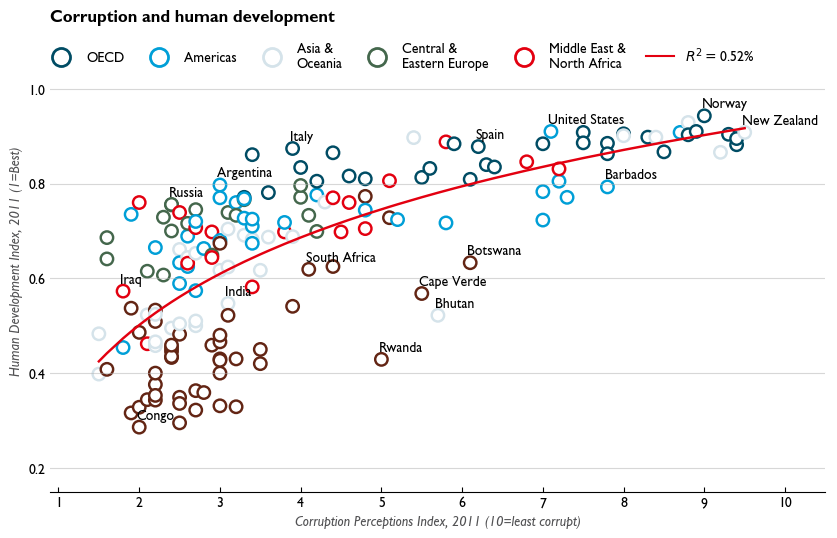

In [35]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.scatter(df.CPI, df.HDI,
           c='w', edgecolors=df.Reg_N,
           s=80, label='_nolegend_', linewidth=1.75)

mod = smf.ols(formula='HDI ~ Log_CPI', data=df).fit()

ax.plot([], [], '-', c='#E30010', label="$R^2=${:.2f}%".format(mod.rsquared))
for r in range(6):
    plt.scatter([], [], c='w', edgecolors=color[r],
                s=75, label=r2[r], linewidth=2)

ax.plot(df.CPI, mod.predict(df.Log_CPI), '-', c='#E30010', linewidth=1.75)

points_to_label = ["Russia", "Iraq", "Congo", "Argentina", "India", "Italy", "South Africa", "Spain",
                     "Botswana", "Cape Verde", "Bhutan", "Rwanda", "United States", "Barbados", "Norway", "New Zealand"]

for c in points_to_label:
    x, y = df.loc[df.Country == c,['CPI', 'HDI']].values.reshape(-1)
    ax.annotate(c, xy=(x, y), xytext=(-2,6),textcoords='offset points', size=10)




ax.set(xlim=(.9,10.5), ylim=(.15, 1.125)) 
ax.spines['top'].set_visible(False)   # only x axis for outline
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which='major', axis='y') # only horizontal grid lines

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_ticks_position('bottom')  # tick stuff - hide the y-axis ones
ax.tick_params(direction='in')
ax.tick_params(axis='y', color='w')

ax.set_xlabel("Corruption Perceptions Index, 2011 (10=least corrupt)", style='italic', color='#525254')  # italic axis labels
ax.set_ylabel("Human Development Index, 2011 (1=Best)", style='italic', color='#525254')
ax.set_title("Corruption and human development", loc='left', fontweight='bold', fontname='Gill Sans MT')  # title - sans, bold, left

handles, labels = ax.get_legend_handles_labels()
order = [1,2,3,4,5,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc=2, bbox_to_anchor=(-0.02, 1), frameon=False, ncol=7, columnspacing=1.5);



In [ ]:
pl = pd.read_csv("https://cdn.rawgit.com/plotly/datasets/master/Canada%20Immigration.csv")

pl['USA'] = pl.USA/1000
pl['UK'] = pl.UK/1000

In [ ]:
fig2, ax2 = plt.subplots(figsize=(14,2.5))

width=.4

ax2.bar(pl.Year-width/2, pl.USA, width=width, color='#004C64', alpha=.95, zorder=3)
ax2.bar(pl.Year+width/2, pl.UK, width=width, color='#E84932', alpha=.75, label="_nolegend_", zorder=3)

ax2.bar(pl.Year, [0]*13, color='#004C64', label='From the US', alpha=.95)
ax2.bar(pl.Year, [0]*13, color='#E84932', label='From Britain', alpha=.75)


ax2.set(ylim=(0, 14))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(False)
ax2.grid(b=True, which='major', axis='y', alpha=.25)

ax2.yaxis.set_major_locator(plt.MaxNLocator(4))
ax2.xaxis.set_major_locator(plt.MaxNLocator(8))
ax2.xaxis.set_ticks_position('bottom')
ax2.annotate("'000", xy=(2003, 13), size=14)
ax2.tick_params(direction='out')
ax2.tick_params(axis='both', color='w')
ax2.legend(ncol=2, frameon=False)
ax2.set_title("Annual immigration to Canada", loc='left', fontweight='bold', fontname='Gill Sans MT');


### Defining an Economist style

In [59]:
import matplotlib._color_data as mcd
import matplotlib.colors as mc

In [ ]:
v = mc.get_named_colors_mapping()

In [57]:
test = {}
for color in color_dict2.keys():
    for i in range(len(color_dict2[color])):
        test[color +':' + str(i)] =  color_dict2[color][i]

In [60]:
mcd.Economist = test

In [ ]:
mcd.Economist

In [ ]:
fig, ax = plt.subplots(figsize=(24,14))
x = np.linspace(0, 10, 50)
i = 1
for color in mcd.Economist.keys():
        #ax.plot(x, [i-5]*len(x), color='w', linewidth=5)
        ax.plot(x, [i]*len(x), color=mcd.Economist[color], linewidth=18)
        plt.text(10.2, i-4.5, '{}-{}'.format(color, mcd.Economist[color]), size=16)
        #ax.plot(x, [i+5]*len(x), color='w', linewidth=5)
        i = i + 20

ax.set(xlim=(0, 12));

In [61]:
e = [mcd.Economist['blue:1'], mcd.Economist['red:0'], 
     mcd.Economist['aquamarine:1'], '#f39200',
     mcd.Economist['blue:0'], mcd.Economist['red:2'],
     mcd.Economist['aquamarine:3'], '#fed630',
     mcd.Economist['blue:2'], mcd.Economist['red:4'] ]

In [ ]:
e

In [ ]:
fig, ax = plt.subplots(figsize=(24,14))
x = np.linspace(0, 10, 50)
i = 1
for color in e:
        #ax.plot(x, [i-5]*len(x), color='w', linewidth=5)
        ax.plot(x, [i]*len(x), color=color, linewidth=18)
        plt.text(10.2, i-4.5, '{}'.format(color), size=16)
        #ax.plot(x, [i+5]*len(x), color='w', linewidth=5)
        i = i + 20

ax.set(xlim=(0, 12));

In [ ]:
col._colors_full_map.update(mcd.Economist)
col._colors_full_map = col._ColorMapping(col._colors_full_map)

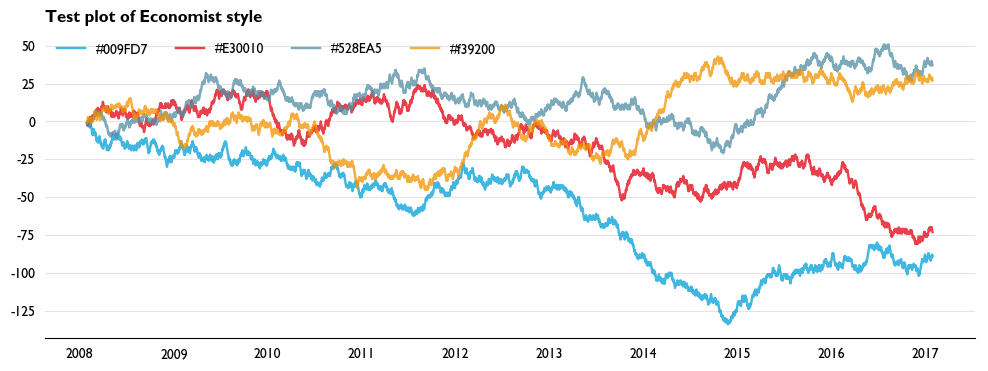

In [64]:
fig, ax = plt.subplots(figsize=(12,4))

dates = pd.date_range('2008-01-29', '2017-01-29')
N = 4
for color in e[:N]: #[4:8]:
    y = pd.Series(np.power(-1, np.random.binomial(1, .5, dates.size)).cumsum(), index=dates)
    ax.plot(y.index, y, color=color, label=color, alpha=.75)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which='major', axis='y', alpha=.333)


ax.xaxis.set_ticks_position('bottom')
#ax2.annotate("'000", xy=(2003, 13), size=14)
ax.tick_params(direction='out')
ax.tick_params(axis='both', color='w')
ax.legend(ncol=N, frameon=False)
#ax.legend(mode='expand')
ax.set_title("Test plot of Economist style", loc='left', fontweight='bold', fontname='Gill Sans MT');

plt.show()


## Creating new color maps

In [ ]:
import matplotlib.colors as col

fig, ax = plt.subplots()

cc = 'red'
n = 4
cmap = col.LinearSegmentedColormap.from_list('', [col.hex2color(color) for color in e[0:n]], N=n)

#cmap = col.LinearSegmentedColormap.from_list('', [(0, 0, 0), (255/255, 205/255, 0/255), (1, 1, 1)], N = 5)
#cmap = col.LinearSegmentedColormap.from_list('', [col.hex2color(color_dict2[color][1]) for color in ['aquamarine']], N=512)

x,y,c = zip(*np.random.rand(600,3)*4-2)

plt.scatter(x,y,c=c, cmap=cmap, alpha=.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which='major', axis='y', alpha=.25)

#ax.yaxis.set_major_locator(plt.MaxNLocator(4))
#ax.xaxis.set_major_locator(plt.MaxNLocator(8))
#ax.yaxis.tick_right()
ax.xaxis.set_ticks_position('bottom')
#ax2.annotate("'000", xy=(2003, 13), size=14)
ax.tick_params(direction='out')
ax.tick_params(axis='both', color='w')
ax.legend(ncol=N, frameon=False)
#ax.legend(mode='expand')
ax.set_title("Test plot of Economist style", loc='left', fontweight='bold', fontname='Gill Sans MT');
plt.colorbar()
plt.show()

## Build up to the style

In [ ]:
import matplotlib.colors as col
mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)

plt.scatter(x,y, alpha=.8)
#plt.colorbar()
plt.show()

In [ ]:
fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)

n = 3
cmap = col.LinearSegmentedColormap.from_list('', [col.hex2color(color) for color in e[0:n]], N=n)



plt.scatter(x,y,c=c, cmap=cmap, alpha=.8);


In [ ]:
fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)

n = 4
cmap = col.LinearSegmentedColormap.from_list('', [col.hex2color(color) for color in e[0:n]], N=n)



plt.scatter(x,y,c=c, cmap=cmap, alpha=.8)
for i in range(n):
    plt.scatter([], [], c=e[i], label=e[i])

ax.set(ylim=(-2.2, 2.5))
ax.legend(ncol=N, frameon=False, columnspacing=1.5)
ax.set_title("Test plot of Economist style", loc='left');


In [ ]:
fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)

n = 4
cmap = col.LinearSegmentedColormap.from_list('', [col.hex2color(color) for color in e[0:n]], N=n)

plt.scatter(x,y,c=c, cmap=cmap, alpha=.8)
for i in range(n):
    plt.scatter([], [], c=e[i], label=e[i])

ax.set(ylim=(-2.2, 2.5))
ax.legend(ncol=N, frameon=False, columnspacing=1.5)
ax.set_title("Test plot of Economist style", loc='left');

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which='major', axis='y', alpha=.25)

## Edit the rcParams

In [63]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams.update({'axes.prop_cycle'                    : "cycler('color', ['#009FD7',  '#E30010',  '#528EA5',  '#f39200',  '#004C64', '#E84932',  '#74BCBF',  '#fed630',  '#75D0F4',  '#EBA289'])",                     
                     'axes.grid'                          : True,
                     'axes.grid.axis'                     : 'y',
                     'axes.grid.which'                    : 'major',
                     'lines.linewidth'                    : 1.75,
                     'lines.markersize'                   : 9,
                     'grid.alpha'                         : 0.5,
                     'axes.labelcolor'                    : '#525254',
                     'axes.spines.left'                   : False, 
                     'axes.spines.bottom'                 : True,
                     'axes.spines.top'                    : False,
                     'axes.spines.right'                  : False,
                     'axes.unicode_minus'                 : False,
                     'figure.titleweight'                 : 'bold',
                     'legend.fontsize'                    : 'medium',
                     'legend.markerscale'                 : 1.5,
                     'legend.frameon'                     : False,
                     'xtick.top'                          : False,   # draw ticks on the top side
                     'xtick.bottom'                       : True,   # draw ticks on the bottom side
                     'ytick.left'                         : False,   # draw ticks on the left side
                     'ytick.right'                        : False,  # draw ticks on the right side
                     'ytick.color'                        : 'k',
                     'font.family'                        : ['Gill Sans MT'],
                     'font.sans-serif'                    : ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'],
                     
                     'patch.linewidth'                    : .25,
                     'patch.edgecolor'                    : 'C4',
                     'patch.force_edgecolor'              : True,
                     'patch.facecolor'                    : 'C8',
                     'boxplot.showmeans'                  : True,
                     'boxplot.whiskers'                   : 2,
                     'boxplot.showfliers'                 : True,
                     'boxplot.meanline'                   : True,
                     'boxplot.flierprops.color'           : 'C4', 
                     'boxplot.flierprops.markerfacecolor' : 'C8',
                     'boxplot.flierprops.markeredgecolor' : 'C4',
                     'boxplot.flierprops.markersize'      : 6.0, 
                     'boxplot.flierprops.linewidth'       : 6.0,
                     'boxplot.boxprops.color'             : 'C4',
                     'boxplot.boxprops.linewidth'         : 1.25, 
                     'boxplot.whiskerprops.color'         : 'C4',
                     'boxplot.whiskerprops.linewidth'     : 1.25,
                     'boxplot.capprops.color'             : 'C4',
                     'boxplot.capprops.linewidth'         : 1.25,
                     'boxplot.medianprops.color'          : 'C4',
                     'boxplot.medianprops.linewidth'      :  1.25,
                     'boxplot.meanprops.color'            :'C4',
                     'boxplot.meanprops.linestyle'        : '--',
                     'boxplot.meanprops.linewidth'        :  1.25,
                    })

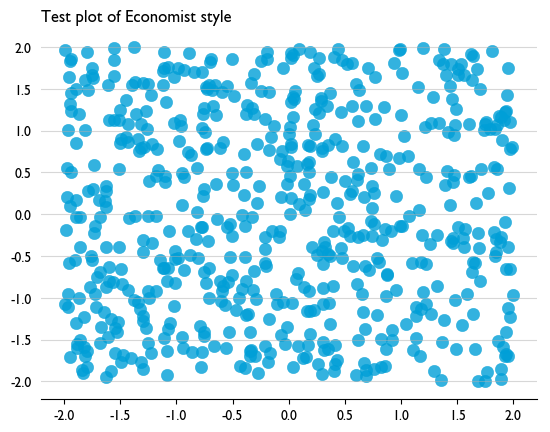

In [46]:
fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)


plt.scatter(x,y, alpha=.8)
ax.set_title("Test plot of Economist style", loc='left');

plt.show()

In [ ]:
fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)

n = 4
cmap = col.LinearSegmentedColormap.from_list('', [col.hex2color(color) for color in e[0:n]], N=n)



plt.scatter(x,y,c=c, cmap=cmap, alpha=.8)
for i in range(n):
    plt.scatter([], [], c=e[i], label=e[i])

ax.set(ylim=(-2.2, 2.5))
ax.legend(ncol=N, frameon=False, columnspacing=1.5)
ax.set_title("Test plot of Economist style", fontweight='bold', loc='left');

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))

dates = pd.date_range('2008-01-29', '2017-01-29')
N = 4
for color in e[:N]: #[4:8]:
    y = pd.Series(np.power(-1, np.random.binomial(1, .5, dates.size)).cumsum(), index=dates)
    ax.plot(y.index, y, color=color, label=color, alpha=.75)
 
ax.legend(ncol=N, frameon=False, columnspacing=1.5)
ax.set_title("Test plot of Economist style", fontweight='bold', loc='left');

In [ ]:
fig, ax = plt.subplots()
z = np.array([-3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 4, 8])
ax.boxplot([z, z+1, z*1.2, -z], patch_artist=True);
ax.set_title("Test plot of Economist style", fontweight='bold', loc='left');

#plt.boxplot(z+1, positions=[4]);

In [ ]:
fig, ax = plt.subplots()

ax.hist(x);

In [ ]:
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')
sns.boxplot(x="day", y="total_bill", data=tips);

In [ ]:
sns.swarmplot(x="day", y="total_bill", data=tips);

In [ ]:
tips = tips.assign(tip_per = tips.total_bill/tips.tip)

In [ ]:
sns.regplot(x='total_bill', y='tip', data=tips);

In [ ]:
tips = tips.assign(is_weekend = 1)

tips.loc[tips.day == "Thur", "is_weekend"] = 0

sns.regplot(x='tip_per', y='is_weekend', data=tips, logistic=True);

In [ ]:
tips = tips.assign(smoker_bin = pd.get_dummies(tips.smoker)['Yes'])

sns.regplot(x="tip_per", y='smoker_bin', data=tips, logistic=True);

In [ ]:
fig2, ax2 = plt.subplots(figsize=(14,2.5))

width=.4

ax2.bar(pl.Year-width/2, pl.USA, width=width, color='C4', alpha=.95, zorder=3)
ax2.bar(pl.Year+width/2, pl.UK, width=width, color='C5', alpha=.75, label="_nolegend_", zorder=3)

ax2.bar(pl.Year, [0]*13, color='C4', label='From the US', alpha=.95)
ax2.bar(pl.Year, [0]*13, color='C5', label='From Britain', alpha=.75)


ax2.set(ylim=(0, 14))


ax2.yaxis.set_major_locator(plt.MaxNLocator(4))
ax2.xaxis.set_major_locator(plt.MaxNLocator(8))
ax2.xaxis.set_ticks_position('bottom')
ax2.annotate("'000", xy=(2003, 13), size=14)

ax2.legend(ncol=2, frameon=False)
ax2.set_title("Annual immigration to Canada", fontweight='bold', loc='left');

In [ ]:
fig2, ax2 = plt.subplots(figsize=(14,2.5))

width=.4

ax2.bar(pl.Year-width/2, pl.USA, width=width, color='#004C64', alpha=.95, zorder=3)
ax2.bar(pl.Year+width/2, pl.UK, width=width, color='#E84932', alpha=.75, label="_nolegend_", zorder=3)

ax2.bar(pl.Year, [0]*13, color='#004C64', label='From the US', alpha=.95)
ax2.bar(pl.Year, [0]*13, color='#E84932', label='From Britain', alpha=.75)


ax2.set(ylim=(0, 14))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(True)
ax2.spines['left'].set_visible(False)
ax2.grid(b=True, which='major', axis='y', alpha=.25)

ax2.yaxis.set_major_locator(plt.MaxNLocator(4))
ax2.xaxis.set_major_locator(plt.MaxNLocator(8))
ax2.xaxis.set_ticks_position('bottom')
ax2.annotate("'000", xy=(2003, 13), size=14)
ax2.tick_params(direction='out')
ax2.tick_params(axis='both', color='w')
ax2.legend(ncol=2, frameon=False)
ax2.set_title("Annual immigration to Canada", loc='left', fontweight='bold', fontname='Gill Sans MT');

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=[10, 6])

ax.scatter(df.CPI, df.HDI,
           c='w', edgecolors=df.Reg_NN,
           s=70, label='_nolegend_', linewidth=1.75)

mod = smf.ols(formula='HDI ~ Log_CPI', data=df).fit()

ax.plot([], [], '-', c='C1', label="$R^2=${:.2f}%".format(mod.rsquared))
for r in range(6):
    plt.scatter([], [], c='w', edgecolors='C{}'.format(r),
                s=75, label=r2[r], linewidth=2)

ax.plot(df.CPI, mod.predict(df.Log_CPI), '-', c='C1', linewidth=1.75)

points_to_label = ["Russia", "Iraq", "Congo", "Argentina", "India", "Italy", "South Africa", "Spain",
                     "Botswana", "Cape Verde", "Bhutan", "Rwanda", "United States", "Barbados", "Norway", "New Zealand"]

for c in points_to_label:
    x, y = df.loc[df.Country == c,['CPI', 'HDI']].values.reshape(-1)
    ax.annotate(c, xy=(x, y), xytext=(-2,6),textcoords='offset points', size=10)




ax.set(xlim=(.9,10.5), ylim=(.15, 1.125)) 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.set_xlabel("Corruption Perceptions Index, 2011 (10=least corrupt)", style='italic')  # italic axis labels
ax.set_ylabel("Human Development Index, 2011 (1=Best)", style='italic')
ax.set_title("Corruption and human development", loc='left', fontweight='bold', fontname='Gill Sans MT')  # title - sans, bold, left

handles, labels = ax.get_legend_handles_labels()
order = [1,2,3,4,5,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc=2, bbox_to_anchor=(-0.02, 1), frameon=False, ncol=7, columnspacing=1.5);




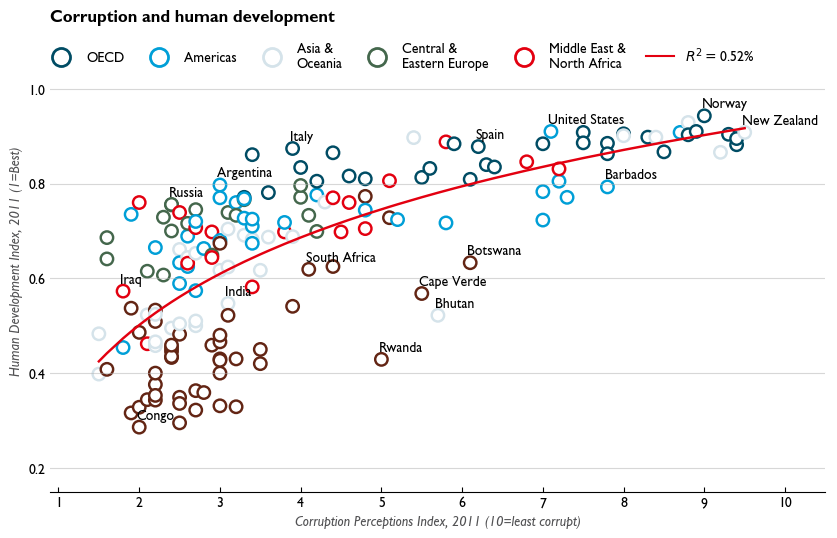

In [47]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.scatter(df.CPI, df.HDI,
           c='w', edgecolors=df.Reg_N,
           s=80, label='_nolegend_', linewidth=1.75)

mod = smf.ols(formula='HDI ~ Log_CPI', data=df).fit()

ax.plot([], [], '-', c='#E30010', label="$R^2=${:.2f}%".format(mod.rsquared))
for r in range(6):
    plt.scatter([], [], c='w', edgecolors=color[r],
                s=75, label=r2[r], linewidth=2)

ax.plot(df.CPI, mod.predict(df.Log_CPI), '-', c='#E30010', linewidth=1.75)

points_to_label = ["Russia", "Iraq", "Congo", "Argentina", "India", "Italy", "South Africa", "Spain",
                     "Botswana", "Cape Verde", "Bhutan", "Rwanda", "United States", "Barbados", "Norway", "New Zealand"]

for c in points_to_label:
    x, y = df.loc[df.Country == c,['CPI', 'HDI']].values.reshape(-1)
    ax.annotate(c, xy=(x, y), xytext=(-2,6),textcoords='offset points', size=10)




ax.set(xlim=(.9,10.5), ylim=(.15, 1.125)) 
ax.spines['top'].set_visible(False)   # only x axis for outline
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)
ax.grid(b=True, which='major', axis='y') # only horizontal grid lines

ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_ticks_position('bottom')  # tick stuff - hide the y-axis ones
ax.tick_params(direction='in')
ax.tick_params(axis='y', color='w')

ax.set_xlabel("Corruption Perceptions Index, 2011 (10=least corrupt)", style='italic', color='#525254')  # italic axis labels
ax.set_ylabel("Human Development Index, 2011 (1=Best)", style='italic', color='#525254')
ax.set_title("Corruption and human development", loc='left', fontweight='bold', fontname='Gill Sans MT')  # title - sans, bold, left

handles, labels = ax.get_legend_handles_labels()
order = [1,2,3,4,5,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc=2, bbox_to_anchor=(-0.02, 1), frameon=False, ncol=7, columnspacing=1.5);




## Test run!

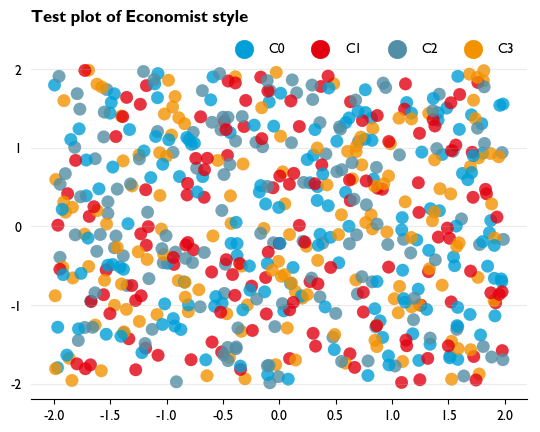

In [53]:

#mpl.rcParams.update(mpl.rcParamsDefault)

fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)

n = 4
cmap = col.LinearSegmentedColormap.from_list('', ['C{}'.format(i) for i in range(n)], N=n)

plt.scatter(x,y,c=c, cmap=cmap, alpha=.8)
for i in range(n):
    plt.scatter([], [], c='C{}'.format(i), label='C{}'.format(i))

ax.set(ylim=(-2.2, 2.5))
ax.legend(ncol=n, frameon=False, columnspacing=1.5)
ax.set_title("Test plot of Economist style", fontweight='bold', loc='left');


ax.grid(b=True, which='major', axis='y', alpha=.25)

plt.show()



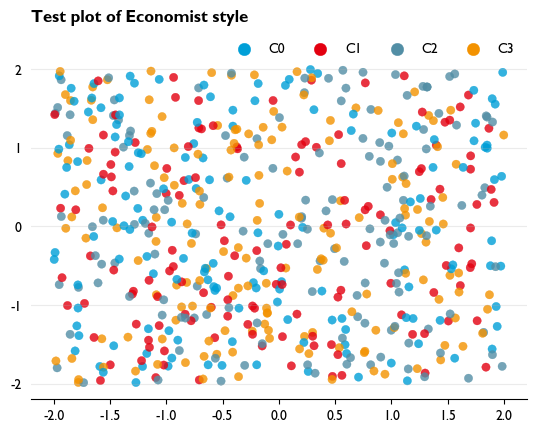

In [44]:
mpl.style.use('theeconomist')

fig, ax = plt.subplots()

x,y,c = zip(*np.random.rand(600,3)*4-2)

n = 4
cmap = col.LinearSegmentedColormap.from_list('', ['C{}'.format(i) for i in range(n)], N=n)

plt.scatter(x,y,c=c, cmap=cmap, alpha=.8)
for i in range(n):
    plt.scatter([], [], c='C{}'.format(i), label='C{}'.format(i))

ax.set(ylim=(-2.2, 2.5))
ax.legend(ncol=n, frameon=False, columnspacing=1.5)
ax.set_title("Test plot of Economist style", fontweight='bold', loc='left');


ax.grid(b=True, which='major', axis='y', alpha=.25)

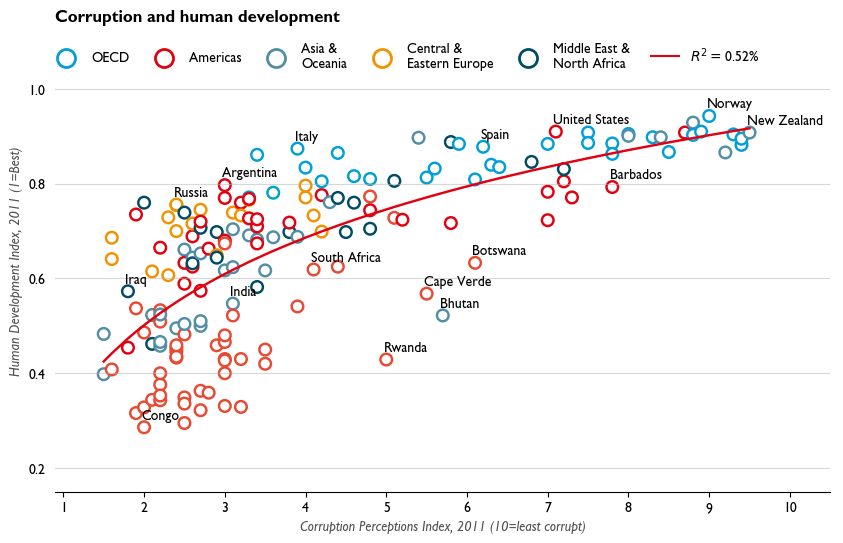

In [36]:
fig, ax = plt.subplots(figsize=[10, 6])

ax.scatter(df.CPI, df.HDI,
           c='w', edgecolors=df.Reg_NN,
           s=70, label='_nolegend_', linewidth=1.75)

mod = smf.ols(formula='HDI ~ Log_CPI', data=df).fit()

ax.plot([], [], '-', c='C1', label="$R^2=${:.2f}%".format(mod.rsquared))
for r in range(6):
    plt.scatter([], [], c='w', edgecolors='C{}'.format(r),
                s=75, label=r2[r], linewidth=2)

ax.plot(df.CPI, mod.predict(df.Log_CPI), '-', c='C1', linewidth=1.75)

points_to_label = ["Russia", "Iraq", "Congo", "Argentina", "India", "Italy", "South Africa", "Spain",
                     "Botswana", "Cape Verde", "Bhutan", "Rwanda", "United States", "Barbados", "Norway", "New Zealand"]

for c in points_to_label:
    x, y = df.loc[df.Country == c,['CPI', 'HDI']].values.reshape(-1)
    ax.annotate(c, xy=(x, y), xytext=(-2,6),textcoords='offset points', size=10)




ax.set(xlim=(.9,10.5), ylim=(.15, 1.125)) 
ax.xaxis.set_major_locator(plt.MaxNLocator(10))

ax.set_xlabel("Corruption Perceptions Index, 2011 (10=least corrupt)", style='italic')  # italic axis labels
ax.set_ylabel("Human Development Index, 2011 (1=Best)", style='italic')
ax.set_title("Corruption and human development", loc='left', fontweight='bold', fontname='Gill Sans MT')  # title - sans, bold, left

handles, labels = ax.get_legend_handles_labels()
order = [1,2,3,4,5,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
          loc=2, bbox_to_anchor=(-0.02, 1), frameon=False, ncol=7, columnspacing=1.5);



plt.show()